<a href="https://colab.research.google.com/github/Jus741/Pandas-Visualization-Practice/blob/main/Copy_of_Learning_Lab_More_Pandas_%26_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Learning Lab: More Pandas & Visualization



**Objective**: In this assignment, you'll learn how to handle missing data, manipulate rows and columns in a DataFrame, iterate through data, and create simple visualizations using Seaborn and Matplotlib.

In [ ]:
# Run this cell, this imports the libraries you will need
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1: Load Dataset
Load the dataset provided using the pd.read_csv function and the url we provided. You can read more about the chosen dataset [here](https://la.myneighborhooddata.org/2021/06/computer-internet-access/).

In [ ]:
url = 'https://usc-ndsc-apim-prod.azure-api.net/map/api/datasets/download/61?request-id=be7dad9a3aec4f738d3e66e86d88d8cb'

# Load the dataset here and assign it to a variable
df = pd.read_csv(url)

# Display the first 5 rows of the DataFrame here
print(df.head())

                  geoid     geoid20  year  denom_tot_hh  nointernet_count  \
0  1400000US06037101110  6037101110  2022        1551.0             187.0   
1  1400000US06037101122  6037101122  2022        1383.0              32.0   
2  1400000US06037101220  6037101220  2022        1349.0             147.0   
3  1400000US06037101221  6037101221  2022        1424.0             268.0   
4  1400000US06037101222  6037101222  2022         928.0             236.0   

   nointernet_pct  onlycellservice_count  onlycellservice_pct  \
0       12.056738                  109.0             7.027724   
1        2.313811                   63.0             4.555314   
2       10.896960                  164.0            12.157153   
3       18.820225                  145.0            10.182584   
4       25.431034                   34.0             3.663793   

   nocomputer_count  nocomputer_pct  onlysmartphone_count  onlysmartphone_pct  
0              91.0        5.867182                 187.0         

### Step 2: Handling Missing Data
In this step, we're going to identify and handle missing values.

In [ ]:
# Check for missing values and display them
missing_values = df.isnull()
missing_count = df.isnull().sum()
missing_values = df[missing_values.any(axis=1)]
print(missing_values)
print(missing_count)

                      geoid     geoid20  year  denom_tot_hh  nointernet_count  \
938    1400000US06037265301  6037265301  2022           0.0               0.0   
1043   1400000US06037277400  6037277400  2022           0.0               0.0   
1221   1400000US06037402404  6037402404  2022           0.0               0.0   
2058   1400000US06037578100  6037578100  2022           0.0               0.0   
2334   1400000US06037901003  6037901003  2022           0.0               0.0   
...                     ...         ...   ...           ...               ...   
14953  1400000US06037980014  6037980014  2017           NaN               NaN   
14959  1400000US06037980020  6037980020  2017           NaN               NaN   
14962  1400000US06037980023  6037980023  2017           NaN               NaN   
14966  1400000US06037980028  6037980028  2017           NaN               NaN   
14967  1400000US06037980030  6037980030  2017           NaN               NaN   

       nointernet_pct  only

In [ ]:
# Drop the missing values
df_cleaned = df.dropna()

# Display the new DataFrame after handling the missing values
print(df_cleaned)

                      geoid     geoid20  year  denom_tot_hh  nointernet_count  \
0      1400000US06037101110  6037101110  2022        1551.0             187.0   
1      1400000US06037101122  6037101122  2022        1383.0              32.0   
2      1400000US06037101220  6037101220  2022        1349.0             147.0   
3      1400000US06037101221  6037101221  2022        1424.0             268.0   
4      1400000US06037101222  6037101222  2022         928.0             236.0   
...                     ...         ...   ...           ...               ...   
14971  1400000US06037980035  6037980035  2017        1851.0             344.0   
14972  1400000US06037980036  6037980036  2017        2515.0             654.0   
14973  1400000US06037980037  6037980037  2017         671.0              52.0   
14974  1400000US06037980038  6037980038  2017        2719.0             355.0   
14975  1400000US06037980039  6037980039  2017          80.0               3.0   

       nointernet_pct  only

### Step 3: Manipulating Rows and Columns
Let's explore how to add, remove, or rename columns and rows.

In [ ]:
# Add a new column named 'Only Cell and Smartphone' that adds together the percentage of households that only have cell service and the percentage of households that only have smartphones
df_cleaned['Only Cell and Smartphone'] = df['onlycellservice_pct'] + df['onlysmartphone_pct']

# Display the new DataFrame
print(df_cleaned)

                      geoid     geoid20  year  denom_tot_hh  nointernet_count  \
0      1400000US06037101110  6037101110  2022        1551.0             187.0   
1      1400000US06037101122  6037101122  2022        1383.0              32.0   
2      1400000US06037101220  6037101220  2022        1349.0             147.0   
3      1400000US06037101221  6037101221  2022        1424.0             268.0   
4      1400000US06037101222  6037101222  2022         928.0             236.0   
...                     ...         ...   ...           ...               ...   
14971  1400000US06037980035  6037980035  2017        1851.0             344.0   
14972  1400000US06037980036  6037980036  2017        2515.0             654.0   
14973  1400000US06037980037  6037980037  2017         671.0              52.0   
14974  1400000US06037980038  6037980038  2017        2719.0             355.0   
14975  1400000US06037980039  6037980039  2017          80.0               3.0   

       nointernet_pct  only

<ipython-input-11-1e99ae248d4a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Only Cell and Smartphone'] = df['onlycellservice_pct'] + df['onlysmartphone_pct']


In [ ]:
# Rename the 'Only Cell and Smartphone' column to 'Only Cell and Smartphone Pct'
df_cleaned = df_cleaned.rename(columns={'Only Cell and Smartphone': 'Only Cell and Smartphone Pct'})

# Display the new DataFrame
print(df_cleaned)

                      geoid     geoid20  year  denom_tot_hh  nointernet_count  \
0      1400000US06037101110  6037101110  2022        1551.0             187.0   
1      1400000US06037101122  6037101122  2022        1383.0              32.0   
2      1400000US06037101220  6037101220  2022        1349.0             147.0   
3      1400000US06037101221  6037101221  2022        1424.0             268.0   
4      1400000US06037101222  6037101222  2022         928.0             236.0   
...                     ...         ...   ...           ...               ...   
14971  1400000US06037980035  6037980035  2017        1851.0             344.0   
14972  1400000US06037980036  6037980036  2017        2515.0             654.0   
14973  1400000US06037980037  6037980037  2017         671.0              52.0   
14974  1400000US06037980038  6037980038  2017        2719.0             355.0   
14975  1400000US06037980039  6037980039  2017          80.0               3.0   

       nointernet_pct  only

In [ ]:
# Remove the 'Only Cell and Smartphone Pct' column
df_cleaned = df_cleaned.drop(columns=['Only Cell and Smartphone Pct'])

# Display the new DataFrame
print(df_cleaned)

                      geoid     geoid20  year  denom_tot_hh  nointernet_count  \
0      1400000US06037101110  6037101110  2022        1551.0             187.0   
1      1400000US06037101122  6037101122  2022        1383.0              32.0   
2      1400000US06037101220  6037101220  2022        1349.0             147.0   
3      1400000US06037101221  6037101221  2022        1424.0             268.0   
4      1400000US06037101222  6037101222  2022         928.0             236.0   
...                     ...         ...   ...           ...               ...   
14971  1400000US06037980035  6037980035  2017        1851.0             344.0   
14972  1400000US06037980036  6037980036  2017        2515.0             654.0   
14973  1400000US06037980037  6037980037  2017         671.0              52.0   
14974  1400000US06037980038  6037980038  2017        2719.0             355.0   
14975  1400000US06037980039  6037980039  2017          80.0               3.0   

       nointernet_pct  only

In [ ]:
# Filter the dataset to remove any rows where the percentage of households having only smartphones is less than 5 percent
df_cleaned = df_cleaned[df_cleaned['onlysmartphone_pct'] >= 5]

# Display the new DataFrame
print(df_cleaned)

                      geoid     geoid20  year  denom_tot_hh  nointernet_count  \
0      1400000US06037101110  6037101110  2022        1551.0             187.0   
2      1400000US06037101220  6037101220  2022        1349.0             147.0   
3      1400000US06037101221  6037101221  2022        1424.0             268.0   
4      1400000US06037101222  6037101222  2022         928.0             236.0   
5      1400000US06037101300  6037101300  2022        1425.0              63.0   
...                     ...         ...   ...           ...               ...   
14945  1400000US06037980006  6037980006  2017          15.0               5.0   
14955  1400000US06037980016  6037980016  2017          91.0              35.0   
14956  1400000US06037980017  6037980017  2017         134.0               9.0   
14968  1400000US06037980031  6037980031  2017          53.0               7.0   
14972  1400000US06037980036  6037980036  2017        2515.0             654.0   

       nointernet_pct  only

###Step 4: Iterating a Dataframe
Let's learn how to step through each element of the dataframe

In [ ]:
# Iterate through each element of the dataframe and print the result
for index, row in df_cleaned.iterrows():
    print(row)

Streaming output truncated to the last 5000 lines.
nointernet_pct                      27.967258
onlycellservice_count                    71.0
onlycellservice_pct                  9.686221
nocomputer_count                         86.0
nocomputer_pct                      11.732606
onlysmartphone_count                     63.0
onlysmartphone_pct                   8.594816
Name: 13766, dtype: object
geoid                    1400000US06037404804
geoid20                            6037404804
year                                     2017
denom_tot_hh                           1281.0
nointernet_count                        165.0
nointernet_pct                      12.880562
onlycellservice_count                    70.0
onlycellservice_pct                  5.464481
nocomputer_count                         76.0
nocomputer_pct                       5.932865
onlysmartphone_count                     96.0
onlysmartphone_pct                   7.494145
Name: 13767, dtype: object
geoid                

###Step 5: PANDAS Visualizations
Create visualisations to illustrate your data.

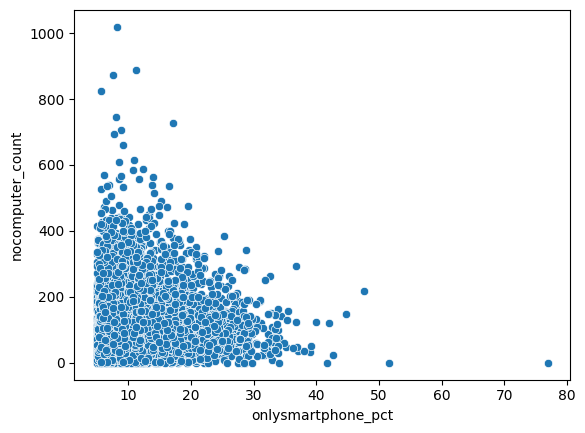

In [ ]:
# Create a scatterplot -> used for 2 numeric/quantitative variables
sns.scatterplot(x='onlysmartphone_pct', y='nocomputer_count', data=df_cleaned)
plt.show()

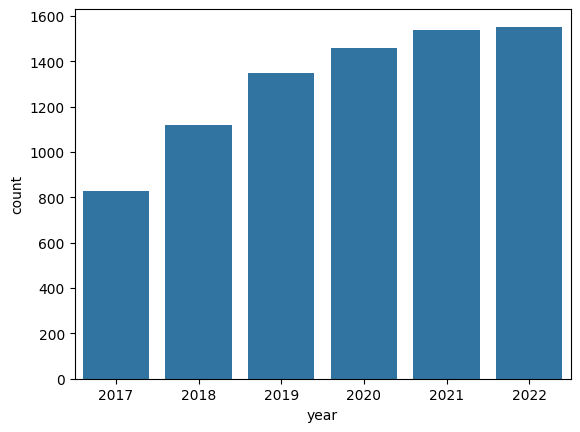

In [ ]:
# Create a count plot -> used for categorical variables
sns.countplot(x='year', data=df_cleaned)
plt.show()

<ipython-input-26-99f872bc60e9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned['onlycellservice_pct'], bins=10)


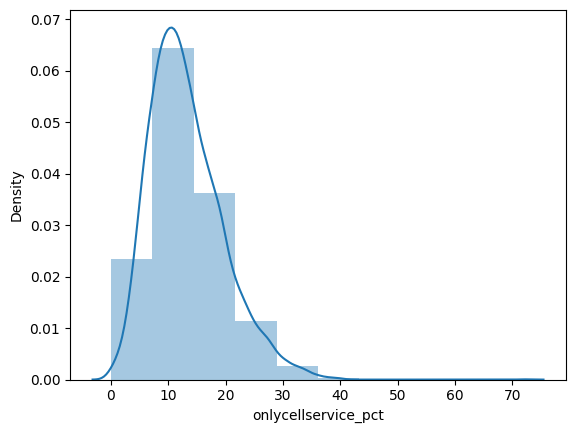

In [ ]:
# Create a dist plot -> used for distribution of continuous variables
sns.distplot(df_cleaned['onlycellservice_pct'], bins=10)
plt.show()